<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
#Pre installation 
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.c

In [2]:
# Write your code here
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME,"ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 125


,Title,Review
0,I would not call it a masterpiece as some did,
1,Not a spoon feeding of CGI fueled faux drama.,The movie affects you in a way that makes it p...
2,Is it great? I don't know.,When I heard everyone saying that this is the ...
3,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
4,"A psychological study, rather than a superhero...",I have seen Joker yesterday at Venice an early...
...,...,...
120,Oscar winner,
121,There Are No Capes Here,Joaquin Phoenix transforms into the titular ch...
122,"If you're an outcast, you'll understand this m...",And I'm not saying you need to be a freak. Man...
123,A Cynical Movie For Cynical Times,Who is the crazier one? The one who is able to...


In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [*] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.............. Chat-

True

In [5]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [10]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
from nltk.stem import PorterStemmer
s = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([s.stem(w) for w in x]))

In [12]:
from textblob import Word
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(w).lemmatize() for w in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

w_sen = []
for s in df['After Lemmatization']:
  w_sen.append(word_tokenize(s))
a = [x1 for x1 in w_sen if x1 != []]
iterations = list(itertools.chain.from_iterable(a))

In [14]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('taxi', 'driver', 'king'): 6, ('driver', 'king', 'comedi'): 6, ('director', 'told', 'phillip'): 6, ('robert', 'de', 'no'): 6, ('dark', 'knight', 'trilog'): 5, ('perform', 'joaquin', 'phoenix'): 5, ('one', 'best', 'perform'): 4, ('chain', 'modern', 'time'): 3, ('10', 'star', 'review'): 3, ('joke', 'first', 'time'): 3, ...})

In [15]:
from collections import Counter
b_grams = nltk.bigrams(iterations)
f_dist = nltk.FreqDist(b_grams)
b_grams_dict = dict(f_dist)
for w in b_grams_dict:
  print( str(w) + ':' + str(b_grams_dict[w] / iterations.count(w[0])))

Streaming output truncated to the last 5000 lines.
('mass', 'murder'):0.3333333333333333
('murder', 'psyco'):1.0
('psyco', 'clown'):1.0
('clown', 'least'):0.06666666666666667
('least', 'make'):0.08333333333333333
('feel', 'better'):0.018867924528301886
('better', 'happen'):0.05555555555555555
('happen', 'wish'):0.07142857142857142
('wish', 'could'):0.3333333333333333
('could', 'avoid'):0.041666666666666664
('avoid', 'e'):0.5
('e', 'miss'):1.0
('miss', 'feel'):0.2
('feel', 'care'):0.018867924528301886
('care', 'time'):0.14285714285714285
('time', 'he'):0.017241379310344827
('he', 'joke'):0.14285714285714285
('joke', 'wish'):0.006535947712418301
('could', 'help'):0.041666666666666664
('help', 'there'):0.16666666666666666
('there', 'lot'):0.16666666666666666
('lot', 'great'):0.07142857142857142
('great', 'nod'):0.024390243902439025
('nod', 'greater'):0.2
('greater', 'batman'):0.3333333333333333
('univers', 'yet'):0.125
('yet', 'movi'):0.14285714285714285
('movi', 'self'):0.005050505050505

In [16]:
w_data = ''
i1 = []
i = 1
for l in df['After Lemmatization']:
  w_data = w_data + l
  value = 'Review-' + str(i)
  i1.append(value)
  i += 1

In [17]:
import nltk
nltk.download('brown')
from textblob import TextBlob
noun_phrases = []
freq = []
for l in df['After Lemmatization']:
  blob = TextBlob(l)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for w in noun_phrases:
  noun_p_freq = []
  for line in df['After Lemmatization']:
    noun_p_freq.append(line.count(w) / w_data.count(w))
  freq.append(noun_p_freq)
noun_phrases_df = pd.DataFrame(freq).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = i1
noun_phrases_df  

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,physic pain experi good way,film year review flood wa,hope excit movi walk cinema,hollow empti continu,film year,real masterpiec cinematographi excel act,sidecharact bland overlay dramat plot heavili relief plottwist film,harsh actual fall flat,good point,phoenix phenomenon score,...,weapon reveng reflect world,mad insan grimac disturb question film pose figur joke,equal fascin frighten piti embodi phoenix unforgett,great depth,wide rang emot train sickl,centuri robert,taxi driver,movi audienc,thoma wayn batman father,classic hope
Review-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-3,0.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Review-124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.043478,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [18]:
# Write your code here

import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.0,0.244136,0.064221,0.055855,0.035297,0.110774,0.058163,0.081918,0.093937,...,0.035297,0.21799,0.0,0.149787,0.079425,0.0,0.099542,0.103716,0.065764,0.180537
1,dramas,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,itselflmao,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.079425,0.0,0.000000,0.000000,0.000000,0.000000
3,war,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,1981,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,daniel,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2863,set,0.0,0.000000,0.000000,0.000000,0.035297,0.000000,0.000000,0.000000,0.000000,...,0.035297,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2864,sour,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2865,chefdoeuvre,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [19]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [20]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
qry_sen = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(qry_sen)
sw = stopwords.words('english') 
X_set = {w1 for w1 in X_list if not w1 in sw}

In [23]:
query_sentence = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}

In [24]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [25]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [26]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,,None
1,The movie affects you in a way that makes it p...,0.058124
2,When I heard everyone saying that this is the ...,0.091192
3,"Truly a masterpiece, The Best Hollywood film o...",0.0
4,I have seen Joker yesterday at Venice an early...,0.030268
...,...,...
120,,None
121,Joaquin Phoenix transforms into the titular ch...,0.0
122,And I'm not saying you need to be a freak. Man...,0.030015
123,Who is the crazier one? The one who is able to...,0.0


In [27]:
def compute_vec(X_set, Y_set):
  rvec = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w1 in rvec: 
      if w1 in X_set: l1.append(1)
      else: l1.append(0) 
      if w1 in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvec, l1, l2

In [28]:
def compute_cos(rvec, l1, l2):
  c1= 0
  for i1 in range(len(rvec)): 
        c1+= l1[i1]*l2[i1] 
  cos = c1 / float((sum(l1)*sum(l2))**0.5) 
  return cos

In [29]:
similar_lst = []
for sen in df['Spelling Correction']:
  Y_list = word_tokenize(sen)
  Y_set = {w1 for w1 in Y_list if not w1 in sw}
  rvector, l1, l2 = compute_vec(X_set, Y_set)
  try:
    similar = compute_cos(rvector, l1, l2)
  except ZeroDivisionError:
    similar = 'None'
  similar_lst.append(similar)
cos_dataframe = pd.DataFrame(list(zip(df['Review'],similar_lst)), columns=['Reviews','Cosine Similarity'])
cos_dataframe

,Reviews,Cosine Similarity
0,,None
1,The movie affects you in a way that makes it p...,0.058124
2,When I heard everyone saying that this is the ...,0.091192
3,"Truly a masterpiece, The Best Hollywood film o...",0.0
4,I have seen Joker yesterday at Venice an early...,0.030268
...,...,...
120,,None
121,Joaquin Phoenix transforms into the titular ch...,0.0
122,And I'm not saying you need to be a freak. Man...,0.030015
123,Who is the crazier one? The one who is able to...,0.0


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [30]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [31]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [32]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME,"ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 124


,Title,Review
0,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
1,"A psychological study, rather than a superhero...",I have seen Joker yesterday at Venice an early...
2,Went for a second time to watch,I get why some people hate this . It's because...
3,JUST AMAZING. How does this movie exist.,Let me start off by saying if Joaquin Phoneix ...
4,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul..."
...,...,...
119,Masterpiece *Movie Of the Year* Best Actor - J...,"Wow I honestly gotta tell you, it's one of the..."
120,The Joker is supposed to be a diabolical maste...,
121,Better if didn't saw,Disturbing. Just got out of the movie. My humo...
122,Why Todd Phillipps Made This Film,You will notice the far left journalists: the ...


In [33]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)

In [34]:
from gensim.models import Word2Vec
model2 = Word2Vec(list2, size = 300)
print(model2)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Word2Vec(vocab=442, size=300, alpha=0.025)


In [35]:
words2 = list(model2.wv.vocab)
words2

['a',
 'The',
 'Best',
 'Hollywood',
 'film',
 'of',
 'one',
 'the',
 'films',
 'And',
 'truly',
 'to',
 'comic',
 'book',
 'so',
 'and',
 'real',
 'people',
 'are',
 'find',
 'it',
 'but',
 "it's",
 "It's",
 'about',
 'society',
 'those',
 'they',
 'can',
 'do',
 'something',
 'way',
 'shows',
 'class',
 'how',
 'rich',
 'others',
 'around',
 'them',
 'is',
 'not',
 "that's",
 'what',
 'makes',
 'There',
 'could',
 'be',
 'in',
 'our',
 'that',
 'much',
 'than',
 'making',
 'this',
 'up',
 'first',
 'film.',
 'A',
 'I',
 'have',
 'seen',
 'Joker',
 'at',
 'an',
 'We',
 'had',
 'some',
 'with',
 'lead',
 'definitely',
 'was',
 'worth',
 'it.',
 'cinema',
 'as',
 'because',
 'far',
 'from',
 'or',
 'movie,',
 'most',
 'genre',
 'It',
 'on',
 'main',
 'character,',
 'Joaquin',
 'Phoenix',
 'does',
 'take',
 'say',
 'both',
 'good.',
 'might',
 'joker',
 'while',
 "Phoenix's",
 'being',
 'movie',
 'superhero',
 'movies',
 'Dark',
 'Knight',
 'easily',
 'good',
 'very',
 'film,',
 'cinemat

In [36]:
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


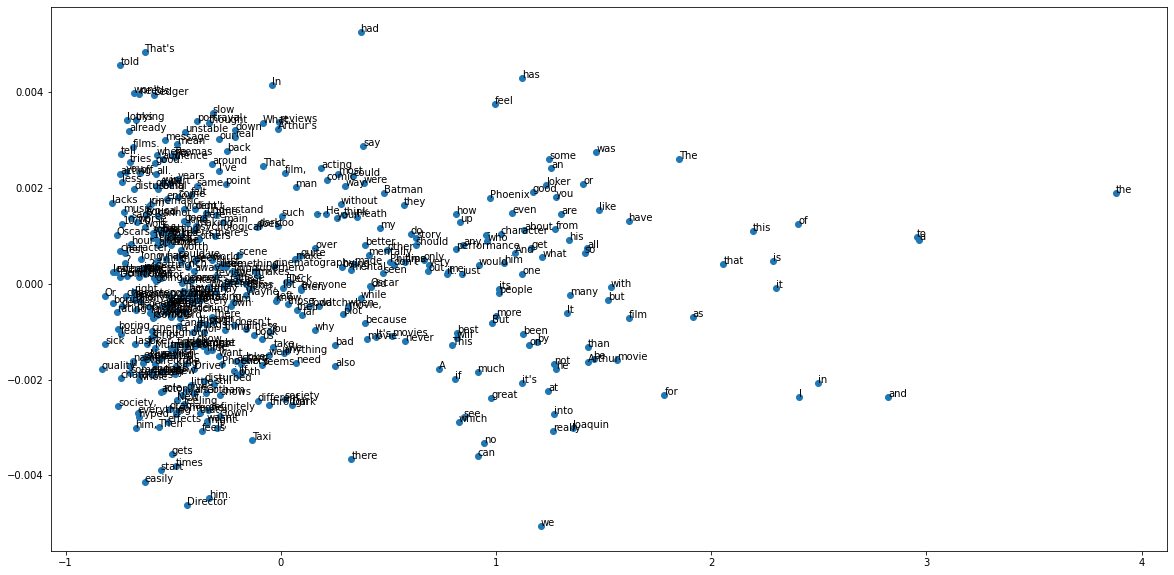

In [37]:
# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/Mahesh-Nunna/INFO-5731--Computational-Methods-for-Information-System-Fall2022-/blob/5428f44517be44f2dce040eef16a887e06947714/sentimental_analysis.csv



